<a href="https://colab.research.google.com/github/ire-mide1/Hamoye_capstone_project_smote/blob/main/EffecientNetB4model_0_9991.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Animal Image classifier using efficient net b4 trasnsfer learning**

In [2]:
import tensorflow as tf
import numpy as np

#seed makes the random generated remain the same random numbers either with numpy or tensorflow
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
#!git clone "http github link"
!git clone https://github.com/ire-mide1/Hamoye_capstone_project_smote

Cloning into 'Hamoye_capstone_project_smote'...
remote: Enumerating objects: 10862, done.
remote: Total 10862 (delta 0), reused 0 (delta 0), pack-reused 10862
Receiving objects: 100% (10862/10862), 361.68 MiB | 34.63 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Checking out files: 100% (10814/10814), done.


In [4]:
#base = path of data folder
BASE = "/content/Hamoye_capstone_project_smote/Data"

train_path = BASE +"/train"
test_path = BASE +"/test"
val_path = BASE +"/val"

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

#IMAGE GENERATOR
# image_dataset_from_directory(main_directory, labels='inferred') will *return* a "tf.data".
#image _size is 380*380 because thats what Efficient NetB4 wants

train_ds = image_dataset_from_directory(train_path,
                                        image_size=(380,380), label_mode='categorical')
val_ds = image_dataset_from_directory(val_path,
                                      image_size=(380,380), label_mode='categorical')

#the test set is not shuffled 
test_ds = image_dataset_from_directory(test_path,shuffle=False,
                                       image_size=(380,380),label_mode='categorical')

# The Dataset gotten are in *batches* of images from the subdirectories, together with labels
# labels= 'inferred' means the labels are infer from the name of the 'folder' of each label class 

Found 7556 files belonging to 4 classes.
Found 2160 files belonging to 4 classes.
Found 1084 files belonging to 4 classes.


In [6]:
val_ds

#rESULT
#batchdataset with 380*380*3 and 4labels

<BatchDataset element_spec=(TensorSpec(shape=(None, 380, 380, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [7]:
#to get the first batch
#first batch of generated images already converted to array
#It also has the labels coverted: labels that was inferred from the folder names and has been one-hot
first_batch = list(val_ds.as_numpy_iterator())[0]
first_batch

(array([[[[2.17078949e+02, 2.11078949e+02, 1.95078949e+02],
          [2.20315796e+02, 2.14078949e+02, 1.98157898e+02],
          [2.24000000e+02, 2.14605270e+02, 1.99736847e+02],
          ...,
          [1.41526245e+02, 1.42526245e+02, 1.47526245e+02],
          [1.32710266e+02, 1.36473511e+02, 1.39631348e+02],
          [1.27131531e+02, 1.31131531e+02, 1.34131531e+02]],
 
         [[2.17078949e+02, 2.11078949e+02, 1.95078949e+02],
          [2.20280472e+02, 2.14043625e+02, 1.98122574e+02],
          [2.23552628e+02, 2.14157898e+02, 1.99289474e+02],
          ...,
          [1.42362122e+02, 1.43362122e+02, 1.48362122e+02],
          [1.32780884e+02, 1.36544128e+02, 1.39701965e+02],
          [1.27131531e+02, 1.31131531e+02, 1.34131531e+02]],
 
         [[2.17234772e+02, 2.11234772e+02, 1.95234772e+02],
          [2.20315796e+02, 2.14078949e+02, 1.98157898e+02],
          [2.23078949e+02, 2.13684219e+02, 1.98815796e+02],
          ...,
          [1.43710480e+02, 1.44710480e+02, 1.4971

In [8]:
#get firstimage array of firstbatch of images
#first_batch[0][0]

#get firstlabel of firstbatch of images
first_batch[1][0]

array([0., 1., 0., 0.], dtype=float32)

In [9]:
df = train_ds.take(1)
df

<TakeDataset element_spec=(TensorSpec(shape=(None, 380, 380, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [10]:
val_ds.class_names

['Buffalo', 'Elephant', 'Rhino', 'Zebra']

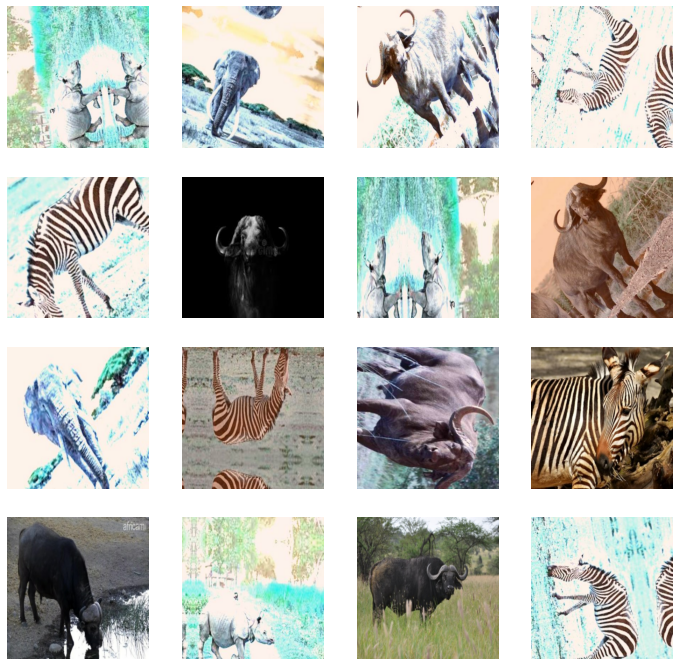

In [11]:
#plot 16 diff images from train_ds
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))
for image,label in train_ds.take(1):
  for i in range(16):
    plt.subplot(4,4,i+1)
    array = image[i].numpy().astype('uint8')
    plt.imshow(array)
    plt.axis('off')
    #plt.title(label[i])


In [12]:
#BUILDING THE MODEL
#initializing the efficientnetb4 to base_model
# include_top=False allows us to easily change the final layer to our custom dataset.

from tensorflow.keras.applications.efficientnet import EfficientNetB4

base_model = EfficientNetB4(include_top=False,input_shape=(380,380,3))

71696384/71686520 [==============================] - 1s 0us/step


In [13]:
#input image array
base_model.input

<KerasTensor: shape=(None, 380, 380, 3) dtype=float32 (created by layer 'input_1')>

In [14]:
#Using tanferred learning from pretrained model
#BUILD OUR OWN MODEL TO SPECIFY 4 OUTPUTS FROM 1000 OF PRETRAINED MODEL

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Model

# add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x) #use average pooling to flatten out layer
output = Dense(4,activation='softmax')(x) #

model = Model(inputs=base_model.input,outputs=output)

base_model.trainable=False
for layer in model.layers:
  if layer.trainable:
    print(layer)

In [15]:
#train your model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,validation_data=val_ds,epochs=20)

Epoch 1/20
237/237 [==============================] - 339s 1s/step - loss: 0.1544 - accuracy: 0.9673 - val_loss: 0.0325 - val_accuracy: 0.9972
Epoch 2/20
237/237 [==============================] - 303s 1s/step - loss: 0.0298 - accuracy: 0.9951 - val_loss: 0.0187 - val_accuracy: 0.9977
Epoch 3/20
237/237 [==============================] - 303s 1s/step - loss: 0.0197 - accuracy: 0.9967 - val_loss: 0.0143 - val_accuracy: 0.9977
Epoch 4/20
237/237 [==============================] - 303s 1s/step - loss: 0.0146 - accuracy: 0.9978 - val_loss: 0.0120 - val_accuracy: 0.9977
Epoch 5/20
237/237 [==============================] - 302s 1s/step - loss: 0.0117 - accuracy: 0.9978 - val_loss: 0.0106 - val_accuracy: 0.9977
Epoch 6/20
237/237 [==============================] - 305s 1s/step - loss: 0.0090 - accuracy: 0.9983 - val_loss: 0.0102 - val_accuracy: 0.9977
Epoch 7/20
237/237 [==============================] - 303s 1s/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0098 - val_accuracy: 0.9968

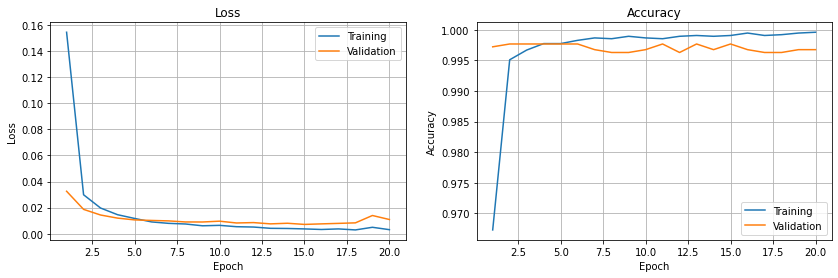

In [23]:
# save results
results = history.history

# plot results
import matplotlib.pyplot as plt
n_epochs = len(results['loss'])

plt.figure(figsize=[14,4])
plt.grid(True)
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), results['loss'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), results['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Evaluation allows us to test our model against data that has never been used for training.
#The test set that has been put aside is used for *evaluation*
#34 batches
model.evaluate(test_ds)

34/34 [==============================] - 37s 1s/step - loss: 0.0060 - accuracy: 0.9991


[0.006040358915925026, 0.9990774989128113]

In [17]:
#we often predict one value but here we predict the whole test data

predictions = model.predict(test_ds)

In [18]:
predictions=predictions.argmax(axis=1)

In [19]:
predictions

array([0, 0, 0, ..., 3, 3, 3])

In [20]:
# get the actual valuesof test_ds without batching it
#unbatch the previous batched images from imagegenerator

test_images = list(test_ds.unbatch().as_numpy_iterator())
y_true = np.array([i[1] for i in test_images])
y_true = y_true.argmax(axis=1)
y_true

array([0, 0, 0, ..., 3, 3, 3])

In [21]:
from sklearn.metrics import f1_score, confusion_matrix

f1_score(y_true,predictions,average='macro')

0.9990774876345898

In [22]:
confusion_matrix(y_true,predictions)

array([[271,   0,   0,   0],
       [  1, 270,   0,   0],
       [  0,   0, 271,   0],
       [  0,   0,   0, 271]])

This model does very well on the predicted data because the F1 score is high. It has high precision(precisely got whe *exact* label to predict) and high recall(got *all* the label to predict correctly) values.